In [1]:
# This is to rain and test the YOLOv5 algorithm on Hard Hat Workers dataset.
# Note: this notebook was run using "Python 3 (ipykernel)" on Azure ML.

# He Zhang, July, 2022

In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torchvision
print("Torch:", torch.__version__)
print("Torchvision:", torchvision.__version__)
print("GPU:", torch.cuda.device_count(), torch.cuda.get_device_name(0)) if torch.cuda.is_available() else print("NO GPU")

Torch: 1.8.1+cu102
Torchvision: 0.9.1+cu102
GPU: 2 Tesla M60


In [3]:
# go to folder YOLOv5
%cd yolov5/

/mnt/batch/tasks/shared/LS_root/mounts/clusters/multi-gpu-2-tesla-m60/code/Users/zhanghe/cv-safety-detection/yolov5


In [3]:
%%writefile ./data/hardhat7041yolov5.yaml

# train & val & test sets
path: ../datasets/hard_hat_workers_dataset # dataset root dir
train: images/train # train images (relative to 'path'), 5269 images
val: images/test # val images (relative to 'path'), 1766 images
test:  # test images (optional), no test images by default in this dataset

# classe information
nc: 3 # number of classes
names: ["head", "helmet", "person"] # class names

Writing ./data/hardhat7041yolov5.yaml


In [4]:
# train
%run -i train.py --img 672 --batch 20 --epochs 10 --data hardhat7041yolov5.yaml --name exp_hardhat --weights yolov5s.pt --cache --device 0

train: weights=yolov5s.pt, cfg=, data=hardhat7041yolov5.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=20, imgsz=672, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp_hardhat, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
fatal: unsafe repository ('/mnt/batch/tasks/shared/LS_root/mounts/clusters/multi-gpu-2-tesla-m60/code/Users/zhanghe/cv-safety-detection/yolov5' is owned by someone else)
To add an exception for this directory, call:

	git config --global --add safe.directory /mnt/batch/tasks/shared/LS_root/mounts/clusters/multi-gpu-2-tesla-m60/code/Users/zhanghe/cv-safety-detection/yolov5


Command 'git fetch && git config --get remote.origin.url' returned non-zero exit status 128.


fatal: unsafe repository ('/mnt/batch/tasks/shared/LS_root/mounts/clusters/multi-gpu-2-tesla-m60/code/Users/zhanghe/cv-safety-detection/yolov5' is owned by someone else)
To add an exception for this directory, call:

	git config --global --add safe.directory /mnt/batch/tasks/shared/LS_root/mounts/clusters/multi-gpu-2-tesla-m60/code/Users/zhanghe/cv-safety-detection/yolov5
YOLOv5 🚀 2022-7-15 Python-3.8.5 torch-1.8.1+cu102 CUDA:0 (Tesla M60, 8129MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspective=0.0, flipud=0.0, fliplr=0.5, mosaic=1.0, mixup=0.0, copy_paste=0.0
Weights & Biases: run 'pip install wandb' to automatically track and visualize YOLOv5 🚀 runs (RECOMMENDED)
TensorBoard: Start with 'tensorboard --logdir runs

In [5]:
# evaluate
%run -i val.py --weights runs/train/exp_hardhat_img544_epo100/weights/best.pt --data hardhat7041yolov5.yaml --name exp_hardhat

val: data=/mnt/batch/tasks/shared/LS_root/mounts/clusters/multi-gpu-2-tesla-m60/code/Users/zhanghe/cv-safety-detection/yolov5/data/hardhat7041yolov5.yaml, weights=['runs/train/exp_hardhat_img544_epo100/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp_hardhat, exist_ok=False, half=False, dnn=False
fatal: unsafe repository ('/mnt/batch/tasks/shared/LS_root/mounts/clusters/multi-gpu-2-tesla-m60/code/Users/zhanghe/cv-safety-detection/yolov5' is owned by someone else)
To add an exception for this directory, call:

	git config --global --add safe.directory /mnt/batch/tasks/shared/LS_root/mounts/clusters/multi-gpu-2-tesla-m60/code/Users/zhanghe/cv-safety-detection/yolov5
YOLOv5 🚀 2022-7-15 Python-3.8.5 torch-1.8.1+cu102 CUDA:0 (Tesla M60, 8129MiB)

Fusing layers... 
Model summary: 213 layers, 

In [8]:
# infer
%run -i detect.py --weights runs/train/exp_hardhat_img544_epo100/weights/best.pt --source ../datasets/test_images/hardhat/ --name exp_hardhat --save-txt --exist-ok --line-thickness 2

detect: weights=['runs/train/exp_hardhat_img544_epo100/weights/best.pt'], source=../datasets/test_images/hardhat/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp_hardhat, exist_ok=True, line_thickness=2, hide_labels=False, hide_conf=False, half=False, dnn=False
fatal: unsafe repository ('/mnt/batch/tasks/shared/LS_root/mounts/clusters/multi-gpu-2-tesla-m60/code/Users/zhanghe/cv-safety-detection/yolov5' is owned by someone else)
To add an exception for this directory, call:

	git config --global --add safe.directory /mnt/batch/tasks/shared/LS_root/mounts/clusters/multi-gpu-2-tesla-m60/code/Users/zhanghe/cv-safety-detection/yolov5
YOLOv5 🚀 2022-7-15 Python-3.8.5 torch-1.8.1+cu102 CUDA:0 (Tesla M60, 8129MiB)

Fusing layers... 
Model summary: 213 layers,

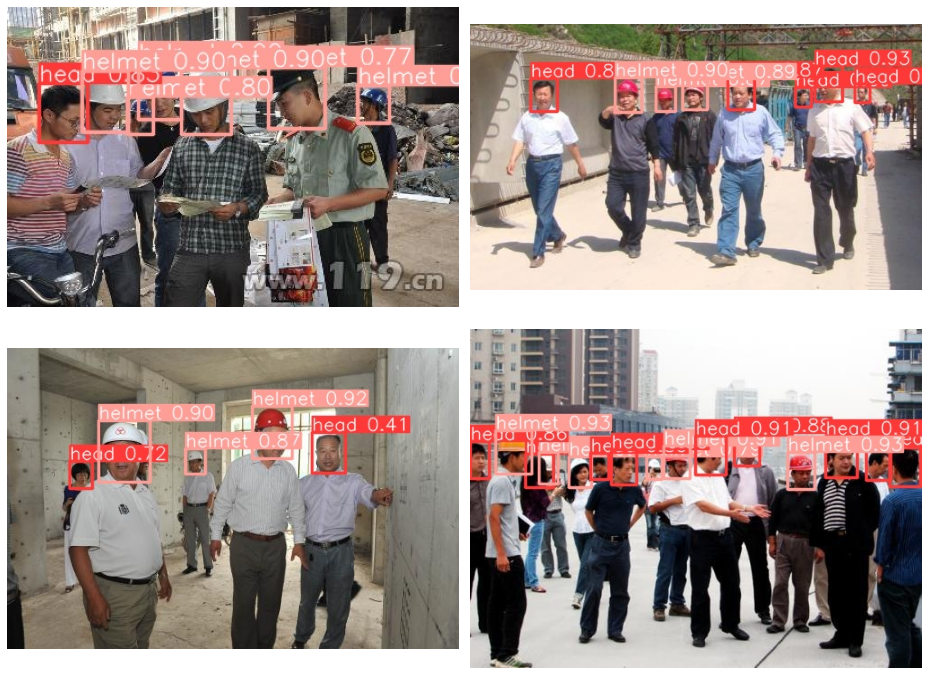

In [4]:
# visualize detection results
bbox_img1 = plt.imread("runs/detect/exp_hardhat/005382_jpg.rf.bad5f80a3fa19ab150532b976adaa2f1.jpg")
bbox_img2 = plt.imread("runs/detect/exp_hardhat/005398_jpg.rf.e985245df68dd22ebdb6312ab2dc9fc2.jpg")
bbox_img3 = plt.imread("runs/detect/exp_hardhat/005407_jpg.rf.c04655757eebeae99b5dc10d9f57972a.jpg")
bbox_img4 = plt.imread("runs/detect/exp_hardhat/005457_jpg.rf.44b81185f7ddc9286805c567057cf9a5.jpg")

plt.figure(figsize=(13, 10))
plt.subplot(2, 2, 1)
plt.imshow(bbox_img1)
plt.axis("off") 

plt.subplot(2, 2, 2)
plt.imshow(bbox_img2)
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(bbox_img3)
plt.axis("off") 

plt.subplot(2, 2, 4)
plt.imshow(bbox_img4)
plt.axis("off")

plt.tight_layout()
plt.show()